In [1]:
#pip install us

Objective

To analyze the geographic distribution, legislative impacts, and infrastructure readiness for electric vehicles,
focusing on their range, price, and utility service areas.

Data Description

1.VIN (Vehicle Identification Number) (1-10 digits):
A unique code used to identify individual vehicles. 

2.County: The administrative division where the vehicle is registered or sold.

3.City: The city where the vehicle is registered or used.

4.State: The state in which the vehicle is registered.

5.Postal Code: The postal code (ZIP code) of the location where the vehicle is registered.

6.Model Year: The year in which the vehicle was manufactured or released.

7.Make: The manufacturer of the vehicle (e.g., Tesla, Nissan, Chevrolet).

8.Model: The specific model of the vehicle (e.g., Model 3, Leaf, Bolt).

9.Electric Vehicle Type:

BEV (Battery Electric Vehicle): Fully electric, powered only by a battery.
PHEV (Plug-in Hybrid Electric Vehicle): Uses both a battery and a gasoline engine.

10.Clean Alternative Fuel: Indicates whether the vehicle uses clean energy sources, such as electricity, hydrogen, or natural gas.

11.Electric Range: The maximum distance the vehicle can travel on a full charge (usually in miles or kilometers).

12.Base MSRP (Manufacturer's Suggested Retail Price): The starting price of the vehicle without any additional options or taxes.

13.Legislative District: Defines the geographic area governed by elected officials (state or federal). 

14.DOL Vehicle ID: A unique identifier for each vehicle, assigned by the Department of Licensing. 

15.Vehicle Location: Refers to the geographic area where the vehicle is located (city, county, or state). 

16.Electric Utility: The electricity provider serving the vehicle's area. 

17.2020 Census Tract: A small geographic unit used by the Census Bureau to collect detailed population data.

In [2]:
!pip install bar-chart-race

In [3]:
#import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import bar_chart_race as bcr
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [5]:
data = pd.read_csv("EV_Data.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [6]:
data.shape

(112634, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [8]:
data.describe(include = 'all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,112634,112634,112634,112634,112634.000000,112634.000000,112634,112614,112634,112634,112634.000000,112634.000000,112348.000000,1.126340e+05,112610,112191,1.126340e+05
unique,7548,165,629,45,NaN,NaN,34,114,2,3,NaN,NaN,NaN,NaN,758,73,NaN
top,5YJYGDEE9M,King,Seattle,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,472,59000,20305,112348,NaN,NaN,52078,23135,86044,58639,NaN,NaN,NaN,NaN,2916,40247,NaN
mean,NaN,NaN,NaN,NaN,98156.226850,2019.003365,NaN,NaN,NaN,NaN,87.812987,1793.439681,29.805604,1.994567e+08,NaN,NaN,5.296650e+10
std,NaN,NaN,NaN,NaN,2648.733064,2.892364,NaN,NaN,NaN,NaN,102.334216,10783.753486,14.700545,9.398427e+07,NaN,NaN,1.699104e+09
min,NaN,NaN,NaN,NaN,1730.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.777000e+03,NaN,NaN,1.101001e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.484142e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98119.000000,2020.000000,NaN,NaN,NaN,NaN,32.000000,0.000000,34.000000,1.923896e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98370.000000,2022.000000,NaN,NaN,NaN,NaN,208.000000,0.000000,43.000000,2.191899e+08,NaN,NaN,5.305307e+10


In [9]:
(data.isnull().sum() * 100 / len(data)).round(2).astype(str) + '%'

VIN (1-10)                                            0.0%
County                                                0.0%
City                                                  0.0%
State                                                 0.0%
Postal Code                                           0.0%
Model Year                                            0.0%
Make                                                  0.0%
Model                                                0.02%
Electric Vehicle Type                                 0.0%
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0.0%
Electric Range                                        0.0%
Base MSRP                                             0.0%
Legislative District                                 0.25%
DOL Vehicle ID                                        0.0%
Vehicle Location                                     0.02%
Electric Utility                                     0.39%
2020 Census Tract                                     0.

In [10]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [11]:
#Fill null values

In [12]:
data['Model'] = data['Model'].fillna(data['Model'].mode()[0])
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District'].mean())
data['Vehicle Location'] = data['Vehicle Location'].fillna(data['Vehicle Location'].mode()[0])
data['Electric Utility'] = data['Electric Utility'].fillna(data['Electric Utility'].mode()[0])

In [13]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#Clean Alternative Fuel Vehicle (CAFV) Eligibility
Map values as eligible,not eligible and unknown

In [14]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(
    {'Clean Alternative Fuel Vehicle Eligible': 'Eligible', 
     'Not eligible due to low battery range': 'Not eligible',
     'Eligibility unknown as battery range has not been researched':'Unknown'})


Data Analysis

Univariate Analysis - Statistical Non Visual Analysis

In [15]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [16]:
discrete_df = data.select_dtypes(include=['object'])

numerical_df = data.select_dtypes(include=['int64', 'float64'])

Discrete univariate analysis

In [17]:
discrete_univariate_analysis(discrete_df)

********** VIN (1-10) **********
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN (1-10), dtype: object
Value Counts: 
 5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: VIN (1-10), Length: 7548, dtype: int64

********** County **********
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Name: County, Le

Numerical univariate analysis

In [18]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [19]:
numerical_univariate_analysis(numerical_df)

********** Postal Code **********
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
Name: Postal Code, dtype: float64

********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
Name: Model Year, dtype: float64

********** Electric Range **********
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
Name: Electric Range, dtype: float64

********** Base MSRP **********
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
Name: Base MSRP, dtype: float64

********** Legislative District **********
min        1.000000
max       49.000000
mean      29.805604
median    34.000000
std       14.681869
Name: Legislative District, dtype: float64

********** DOL Vehicle ID **********
min       4.777000e+03
max       4.792548e+08
mean

Univariate - Visual Analysis

Make Distribution

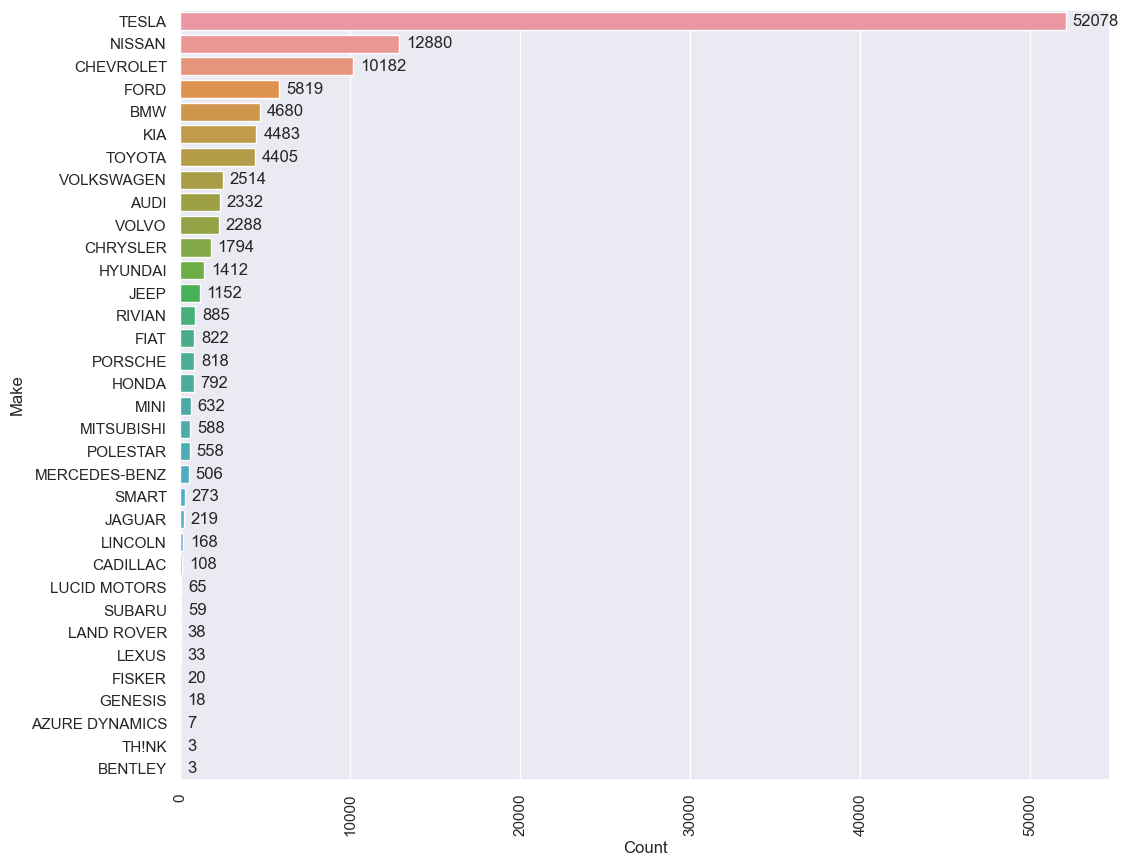

In [20]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=data['Make'].value_counts().values, y=data['Make'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',  # Annotation text
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
                ha='left', va='center',  # Align text to the left
                xytext=(5, 0),  # Move the text slightly outside the bar
                textcoords='offset points')  # Offset for the annotation
plt.xlabel('Count')
plt.ylabel('Make')
plt.xticks(rotation = 90)
plt.show()

Top 15 Models

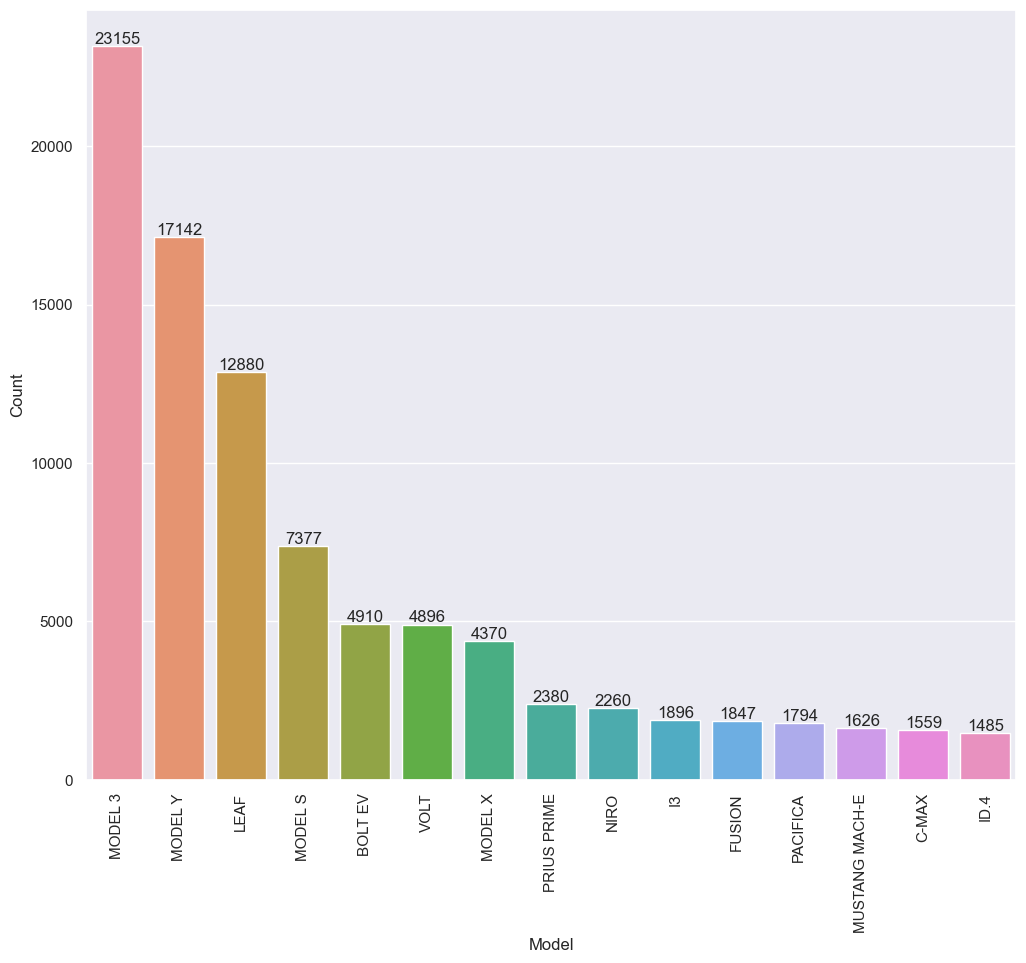

In [21]:
plt.figure(figsize=(12,10))
top_model = data['Model'].value_counts().nlargest(15).reset_index()
ax = sns.barplot(x=top_model['index'], y=top_model['Model'].values)
# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5),  # Distance of text from the bar
                textcoords='offset points')


plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Electric Vehicle Types

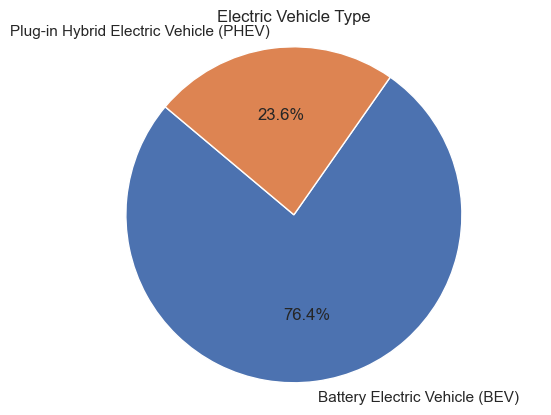

In [22]:
# Count the categories
counts = data['Electric Vehicle Type'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Electric Vehicle Type')
plt.axis('equal')  
plt.show()

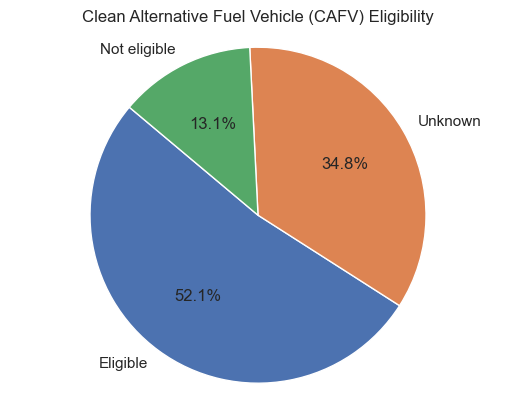

In [23]:
# Count the categories
counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.axis('equal')  
plt.show()



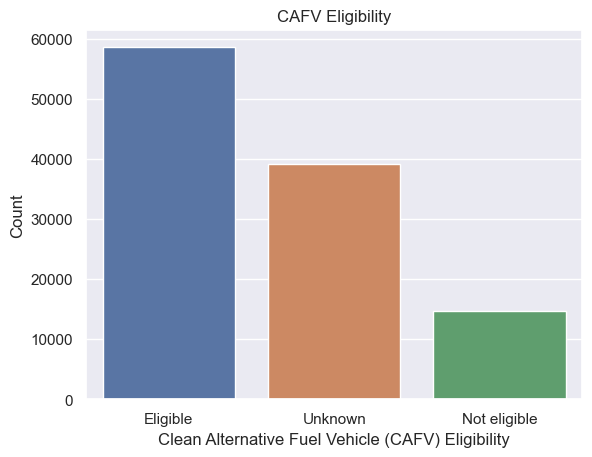

In [24]:
sns.barplot(x=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index, y=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().values)
plt.title("CAFV Eligibility")
plt.xlabel('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.ylabel('Count')
plt.show()

Model Year Distribution

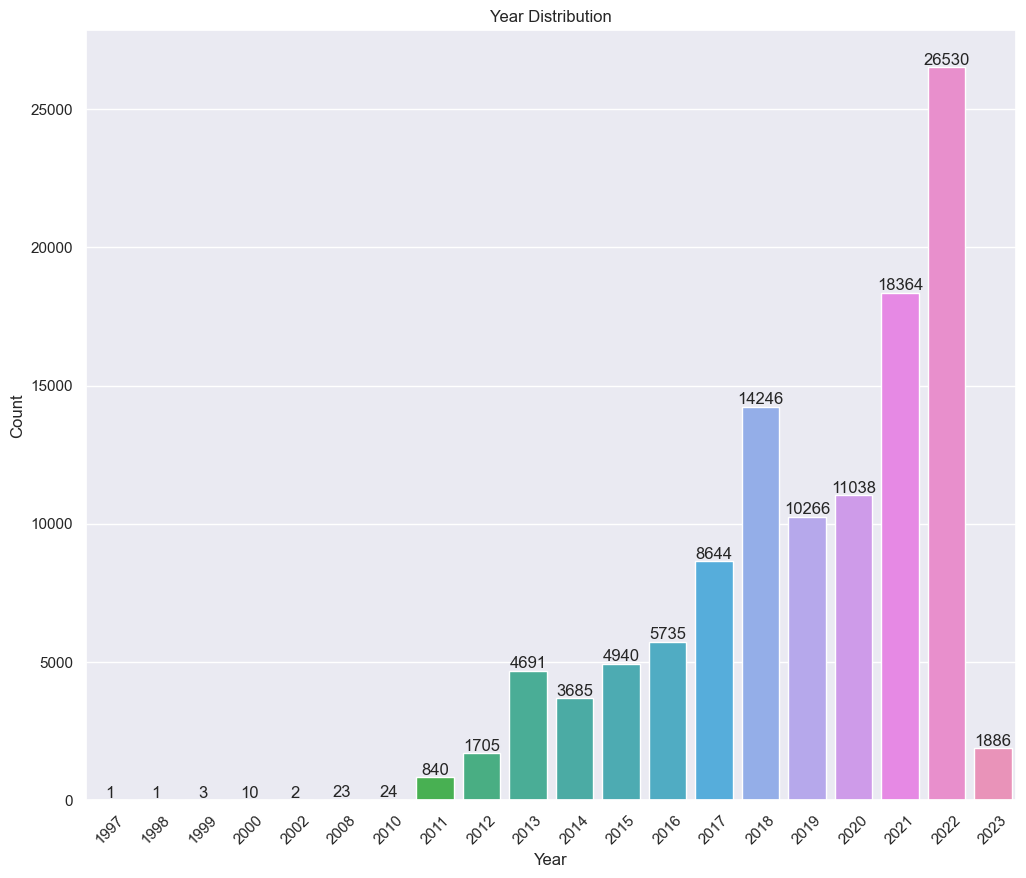

In [25]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=data['Model Year'].value_counts().index, y=data['Model Year'].value_counts().values)
# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5),  # Distance of text from the bar
                textcoords='offset points')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

Distribution of electric range

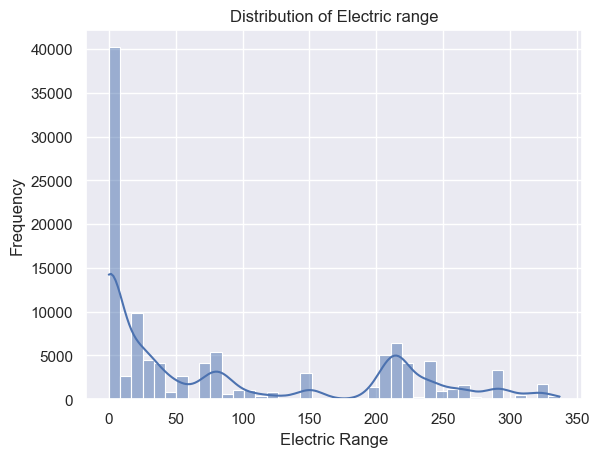

In [26]:
sns.histplot(data['Electric Range'],kde = True)
plt.title("Distribution of Electric range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

Bivariate Analysis

Electric range distribution for each make

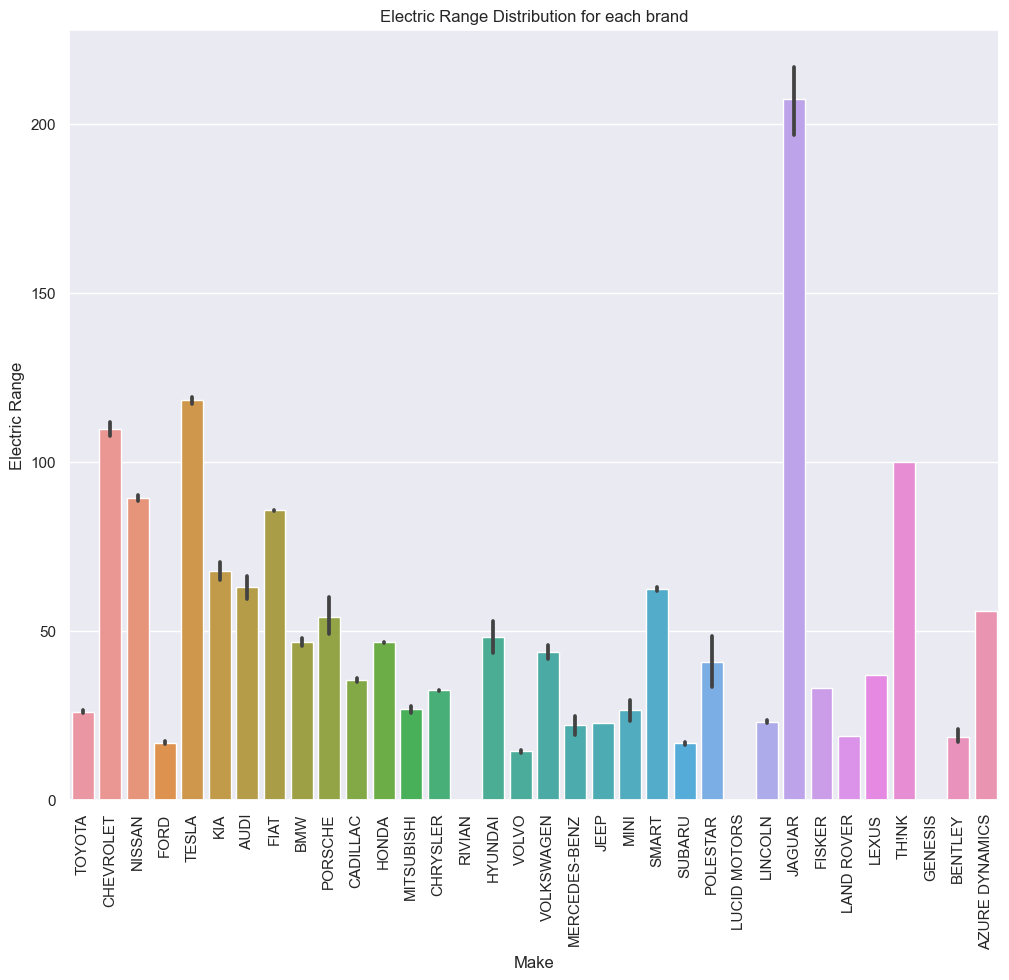

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(x=data['Make'],y=data['Electric Range'])
plt.title("Electric Range Distribution for each brand")
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.xticks(rotation = 90)
plt.show()
plt.show()

Comparison of Electric Range Across Vehicle Types Over Model Years

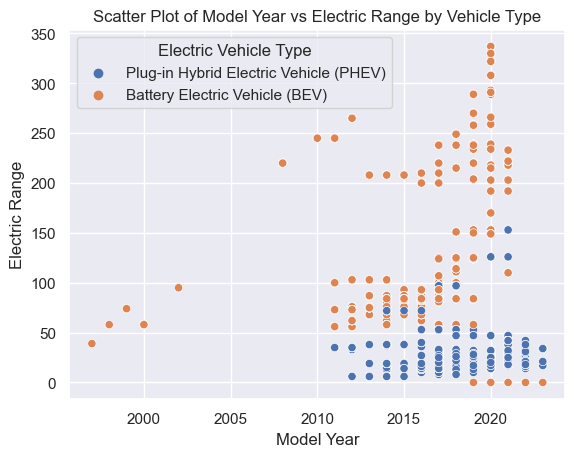

In [28]:
sns.scatterplot(x='Model Year', y='Electric Range', hue='Electric Vehicle Type', data=data)

plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Scatter Plot of Model Year vs Electric Range by Vehicle Type')

plt.show()

CAFV Eligibility Distribution Across Electric Vehicle Types

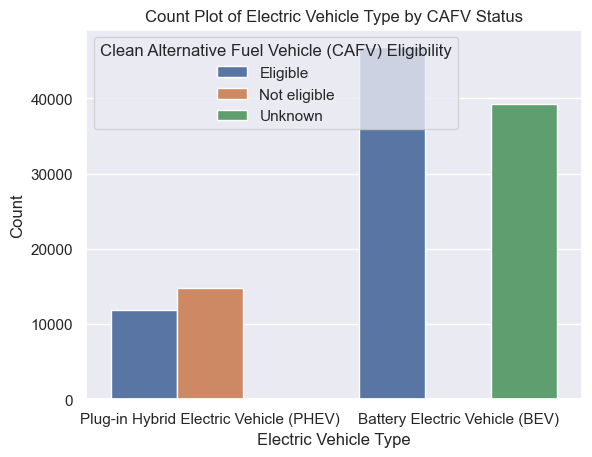

In [29]:
sns.countplot(x='Electric Vehicle Type', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=data)

plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Count Plot of Electric Vehicle Type by CAFV Status')

plt.show()

Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [30]:
temp_data = data.groupby("State").size().reset_index(name = 'EV Count')

In [ ]:

with open(r"C:\Users\Ushamasani\Downloads\wa_washington_zip_codes_geo.min.json") as f:
    geojson = json.load(f)

wash_data = data[data['State'] == 'WA']
post_data = wash_data.groupby('Postal Code').size().reset_index(name='EV_Count')
post_data

# Create the choropleth map for postal codes
fig = px.choropleth(post_data,
                    geojson=geojson,  
                    locations='Postal Code',  
                    featureidkey="properties.ZCTA5CE10",  
                    color='EV_Count',  
                    hover_name='Postal Code',
                    hover_data={'EV_Count': True},
                    color_continuous_scale='Inferno',
                    title='Number of EVs by Postal Code in Washington'
                   )

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [ ]:
fig = px.choropleth(temp_data,
                    locations='State',  
                    color = 'EV Count',  
                    scope = "usa" ,
                    locationmode='USA-states',
                    color_continuous_scale = 'Blues',
                    title = 'Number of EV by state',
                    labels = {'EV Count':'Number of electric vehicle'}
                   )
fig.update_geos(fitbounds="locations")
fig.show()

Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [ ]:
data['Model Year'] = data['Model Year'].astype(str)

grouped_data = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

In [ ]:
# Create the bar chart race and save it as a .gif
bcr.bar_chart_race(
    df=pivoted_data, 
    filename='EV_make_racing_bar_plot.gif', 
    orientation='h', 
    sort='desc', 
    n_bars=10, 
    steps_per_period=45,
    title='EV Make Count Over the Years', 
    filter_column_colors=True,  
    period_label={
        'x': .95, 'y': .15,
        'ha': 'right',
        'va': 'center',
        'size': 20,
        'weight': 'semibold'
    },
    period_length=2000
)

# Display the .gif in the Jupyter notebook
Image(filename='EV_make_racing_bar_plot.gif')

Conclusion

Electric Vehicle (EV) analysis highlights the growing significance of electric vehicles in the automotive market.

There is a notable increase in EV adoption driven by environmental concerns, government incentives, and advancements in battery technology.

Traditional automakers and new entrants are competing to capture market share, leading to innovations in vehicle design and performance.

The expansion of charging infrastructure is critical for supporting EV growth, enhancing consumer confidence, and addressing range anxiety.